### Analysis of High Dimensional Data - Lab 3
### Unsupervised learning
### #Biplot
 
#                               Group 2
#### Isaac DOKU 
#### Arnaud WATUSADISI MAVAKALA 
####   Rosine Agatha Nathalie FAYE 
   #### Netho Junior KANINGINI LUTALA 
  #### Balbine Olive MBOUA ETOGA 
  #### Faith KIMONGO 
  #### Sokhna Aminata Sy DIOUF 
  #### Yoro DIA 


###### Dr. Chamberlain Mbah --yields.io

--------------

**The purpose of the following exercises is mainly to get more familiar with biplot, and learn how to interpret these kinds of plots**

#### Import relevant libraries

In [5]:
import os #for operating system information such as working directory
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# We will import linear regression and two penalised regressions lasso and ridge
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [6]:
os.getcwd()

'/home/students/Bureau/InPy/BIG-DATA/today/lab sessions'

In [7]:
#Data path

pathData='/home/students/Bureau/InPy/BIG-DATA/today/lab sessions/data'

In [8]:
# Read in the data 
Industries=pd.read_csv(pathData+'/Industries.csv')
Industries

,country,agriculture,mining,manufacturing,power.supply,construction,services,finance,social.sector,transport
0,Belgium,3.3,0.9,27.6,0.9,8.2,19.1,6.2,26.6,7.2
1,Denmark,9.2,0.1,21.8,0.6,8.3,14.6,6.5,32.2,7.1
2,France,10.8,0.8,27.5,0.9,8.9,16.8,6.0,22.6,5.7
3,W. Germany,6.7,1.3,35.8,0.9,7.3,14.4,5.0,22.3,6.1
4,Ireland,23.2,1.0,20.7,1.3,7.5,16.8,2.8,20.8,6.1
5,Italy,15.9,0.6,27.6,0.5,10.0,18.1,1.6,20.1,5.7
6,Luxembourg,7.7,3.1,30.8,0.8,9.2,18.5,4.6,19.2,6.2
7,Netherlands,6.3,0.1,22.5,1.0,9.9,18.0,6.8,28.5,6.8
8,UK,2.7,1.4,30.2,1.4,6.9,16.9,5.7,28.3,6.4
9,Austria,12.7,1.1,30.2,1.4,9.0,16.8,4.9,16.8,7.0


In [9]:
Industries.shape

(26, 10)

## Exercises 

In this exercise we will focus on the interpretation of the biplot.

The file `Industries.csv` contains data on the distribution of employment between 9 industrial sectors, in 26
European countries. The dataset stems from the Cold-War era; the data are expressed as percentages. Read in the data and have a feel about it.


1. Perform the truncated SVD for k = 2, and construct the biplot accordingly. Check the course notes for this

In [11]:
X=Industries.drop('country',axis=1)
n=X.shape[0]


#We center X                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
H=np.diag(np.repeat(1,n))-(1/n)*np.ones((n,n))

X_centered=np.matmul(H,X)
U,D,V_transpose=np.linalg.svd(X_centered)

In [17]:
k=2

U_k=U[:,0:k]
D_k=np.diag(D[0:k])
Z_k=np.matmul(U_k,D_k)

pd.DataFrame(Z_k,index=Industries.country,columns=['Z_1','Z_2']).head(10)


,Z_1,Z_2
country,,
Belgium,-17.516687,-4.926228
Denmark,-11.496688,-11.661766
France,-9.128686,-2.168282
W. Germany,-14.393424,5.047494
Ireland,4.458174,-6.131565
Italy,-4.026684,-0.388895
Luxembourg,-12.089752,2.332369
Netherlands,-13.900455,-9.723590
UK,-18.728675,-3.331789


2. To see if we can learn more when retaining more dimensions, repeat the truncated SVD for k = 3.
Construct two-dimensional biplots for:
* Z1 and Z2
* Z1 and Z3
* Z2 and Z3

In [18]:
#To see if we can learn more when retaining more dimensions, repeat the truncated SVD for k = 3. Construct two-dimensional biplots for:
k=3

U_k=U[:,0:k]
D_k=np.diag(D[0:k])
Z_k=np.matmul(U_k,D_k)

pd.DataFrame(Z_k,index=Industries.country,columns=['Z_1','Z_2','Z_3']).head(10)


,Z_1,Z_2,Z_3
country,,,
Belgium,-17.516687,-4.926228,-2.355281
Denmark,-11.496688,-11.661766,3.002028
France,-9.128686,-2.168282,-2.750306
W. Germany,-14.393424,5.047494,0.205690
Ireland,4.458174,-6.131565,-1.924001
Italy,-4.026684,-0.388895,-2.405862
Luxembourg,-12.089752,2.332369,-4.628067
Netherlands,-13.900455,-9.723590,-1.709814
UK,-18.728675,-3.331789,0.589384


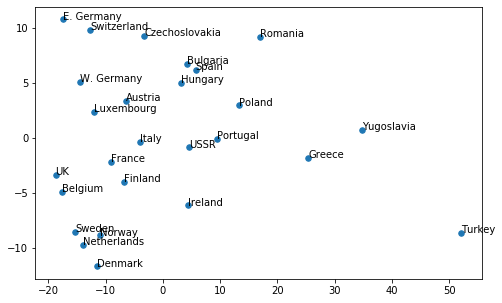

In [19]:
#Visulisation in 2D Z1 and Z2
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x=Z_k[:,0],y=Z_k[:,1],s=30)
txt=Industries.country

for i, txt in enumerate(txt):
    ax.annotate(txt, (Z_k[i,0],Z_k[i,1]))
plt.show()

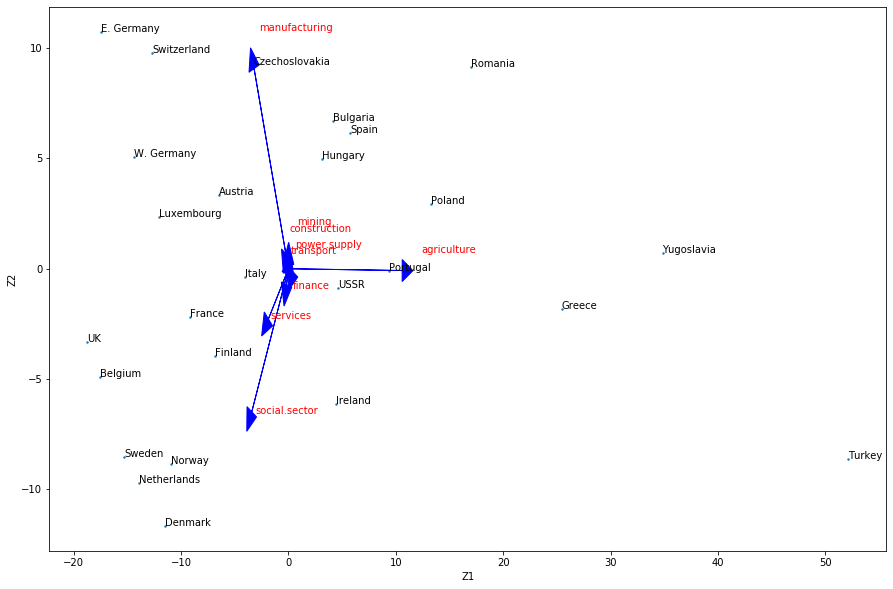

In [21]:
V_k=V_transpose.T[:,0:k]
fig, ax = plt.subplots(figsize=(15,10))
ax.set_xlabel('Z1')
ax.set_ylabel('Z2')
ax.scatter(x=Z_k[:,0],y=Z_k[:,1],s=2)
txt1=Industries.country
txt2=Industries.columns[1:]
gamma=13
for i, txt1 in enumerate(txt1):
    ax.annotate(txt1, (Z_k[i,0],Z_k[i,1]))
for i in range(Industries.shape[1]-1):  
    ax.arrow(0,0, 
             gamma*V_k[i,0],gamma*V_k[i,1],
             color="blue",
            length_includes_head=True,head_width=1, head_length=1)
    
    ax.annotate(txt2[i], (gamma*(V_k[i,0]+0.06),gamma*(V_k[i,1]+0.06)),
                color='red')
plt.show()

A few remarks/conclusions about the biplot:

* the origin corresponds to the sample average of the 9-dimensional observations in
  the data matrix
  
* Italy is close to the origin and thus one could say that the distribution of employment in
  Italy is  the average in all industrial sectors
  
* projecting Turkey orthogonally onto the vector $\mathbf{\tilde v}_{2j}$ of agriculture (i.e., $j$ = agriculture), we get a large and positive $x_{2ij}$. Hence, people in Turkey tend to practice more agriculture.
  
* projecting Denmark orthogonally onto the vector $\mathbf{\tilde v}_{2j}$ of social sector (i.e., $j$ = social sector), we get a large and negative $x_{2ij}$. Hence, people in Denmark tend to employ less people in social sector.

*  projecting E.Germany orthogonally onto the vector $\mathbf{\tilde v}_{2j}$ of manufacturing (i.e., $j$ = manufacturing), we get a large and positive $x_{2ij}$. Hence, people in E.Germany tend to practice more manufacturing.

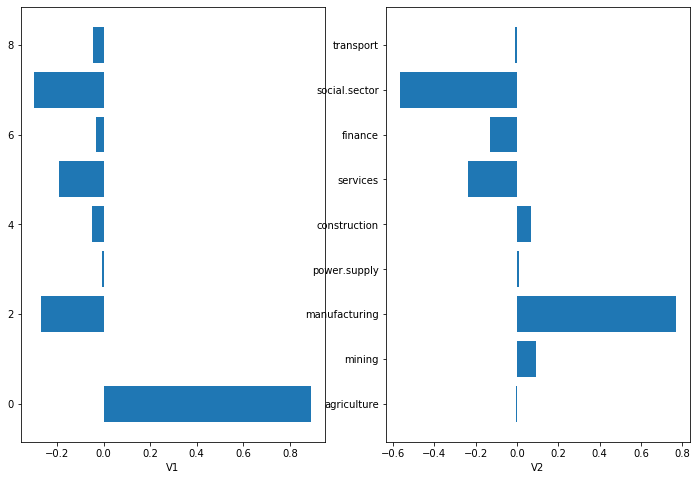

In [30]:
fig, ax = plt.subplots(1,2,figsize=(12,8))
y_pos = np.arange(9)

ax[0].set_xlabel('V1')
ax[1].set_xlabel('V2')

# Create horizontal bars
ax[0].barh(y_pos, V_k[:,0])
ax[1].barh(y_pos, V_k[:,1])
plt.yticks(y_pos, Industries.columns[1:])
plt.show()

For $\mathbf v_1$ (1st dimension of $\mathbf Z_2$ ):

* contrast of agriculture versus social sector,manufacturing and services
* a large value of $z_{i2}$ can result from employing many people in agriculture but employs less people in social sector,manufacturing and services
* a small value of $z_{i2}$  can result from employing few people in agriculture but employs many people in social sector, services and in manufacturing.

For $\mathbf v_2$ (2nd dimension of $\mathbf Z_2$ ):
* contrast of manufacturing and mining versus social sector and services.
* a large value of $z_{i2}$ can result from huge employment in manufacturing and mining, but less employment in services and social sector.
* a small value of $z_{i2}$ can result from less employment in manufacturing and mining, but huge employment in services and social sector

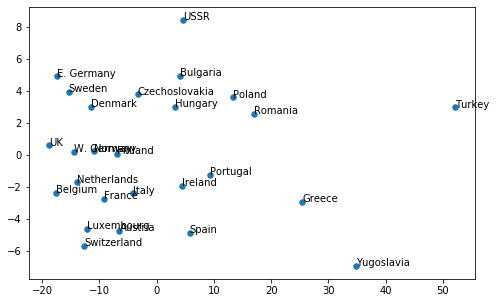

In [22]:
#Visulisation in 2D Z1 and Z3
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x=Z_k[:,0],y=Z_k[:,2],s=30)
txt=Industries.country

for i, txt in enumerate(txt):
    ax.annotate(txt, (Z_k[i,0],Z_k[i,2]))
plt.show()

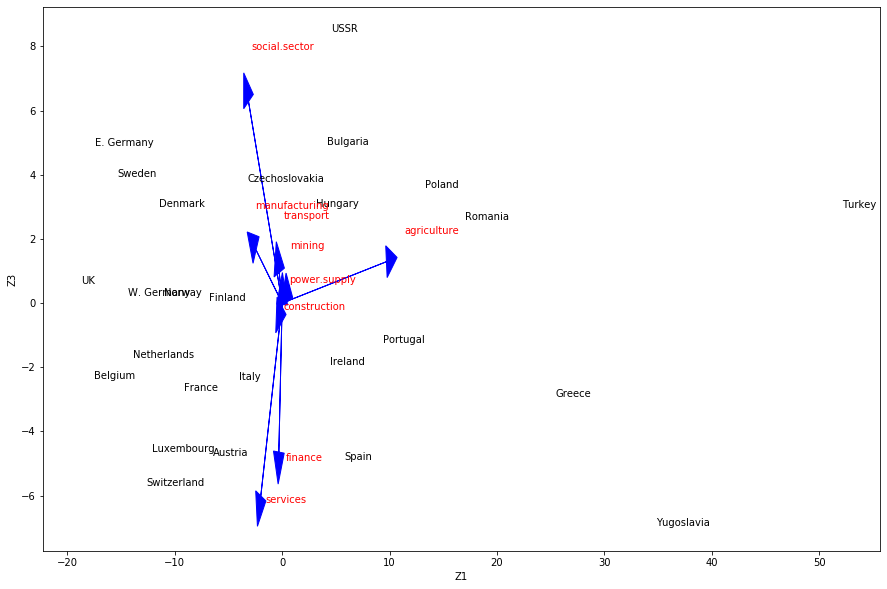

In [23]:
V_k=V_transpose.T[:,0:k]
fig, ax = plt.subplots(figsize=(15,10))
ax.set_xlabel('Z1')
ax.set_ylabel('Z3')
ax.scatter(x=Z_k[:,0],y=Z_k[:,2],s=0)
txt1=Industries.country
txt2=Industries.columns[1:]
gamma=12
for i, txt1 in enumerate(txt1):
    ax.annotate(txt1, (Z_k[i,0],Z_k[i,2]))
for i in range(Industries.shape[1]-1):  
    ax.arrow(0,0, 
             gamma*V_k[i,0],gamma*V_k[i,2],
             color="blue",
            length_includes_head=True,head_width=1, head_length=1)
    
    ax.annotate(txt2[i], (gamma*(V_k[i,0]+0.06),gamma*(V_k[i,2]+0.06)),
                color='red')
plt.show()

A few remarks/conclusions about the biplot:

* the origin corresponds to the sample average of the 9-dimensional observations in
  the data matrix
  
* Finland is close to the origin and thus one could say that the distribution of employment in
  Finland is  the average in all industrial sectors.
  
* projecting Yugoslavia orthogonally onto the vector $\mathbf{\tilde v}_{3j}$ of services (i.e., $j$ = services), we get a large and negative $x_{3ij}$. Hence, people in Yugoslavia tend to practice less services.
  
* projecting USSR orthogonally onto the vector $\mathbf{\tilde v}_{3j}$ of social sector (i.e., $j$ = social sector), we get a large and positive $x_{3ij}$. Hence, people in USSR tend to employ many people in social sector.

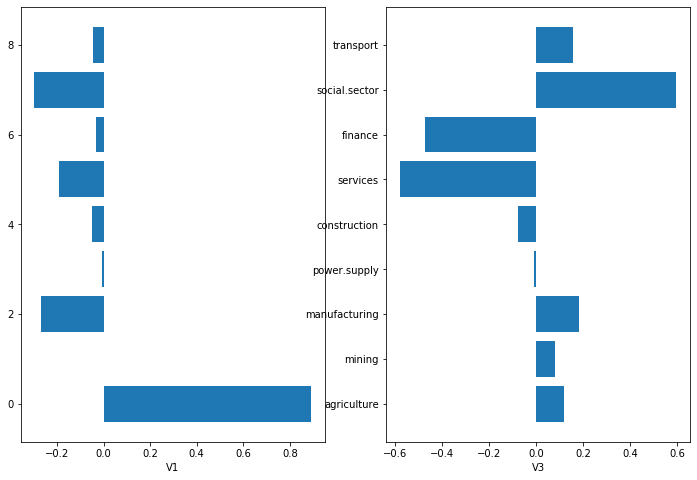

In [24]:
fig, ax = plt.subplots(1,2,figsize=(12,8))
y_pos = np.arange(9)

ax[0].set_xlabel('V1')
ax[1].set_xlabel('V3')

# Create horizontal bars
ax[0].barh(y_pos, V_k[:,0])
ax[1].barh(y_pos, V_k[:,2])
plt.yticks(y_pos, Industries.columns[1:])
plt.show()

For $\mathbf v_1$ (1st dimension of $\mathbf Z_3$ ):

* contrast of agriculture versus social sector,manufacturing and services
* a large value of $z_{i3}$ can result from employing many people in agriculture but employs less people in social sector,manufacturing and services
* a small value of $z_{i3}$  can result from employing few people in agriculture but employs many people in social sector, services and in manufacturing.

For $\mathbf v_3$ (2nd dimension of $\mathbf Z_3$ ):
* contrast of social sector versus services and finance
* a large value of $z_{i3}$ can result from huge employment in social sector, but less employment in services and finance.
* a small value of $z_{i3}$ can result from less employment in social sector, but huge employment in services and finance.

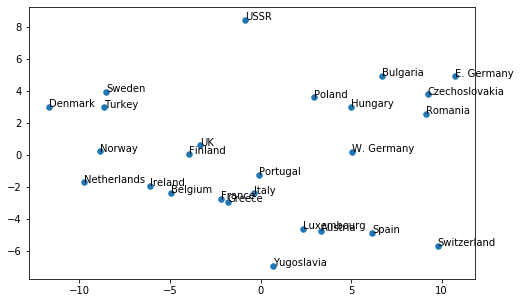

In [25]:
#Visulisation in 2D Z2 and Z3
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x=Z_k[:,1],y=Z_k[:,2],s=30)
txt=Industries.country

for i, txt in enumerate(txt):
    ax.annotate(txt, (Z_k[i,1],Z_k[i,2]))
plt.show()

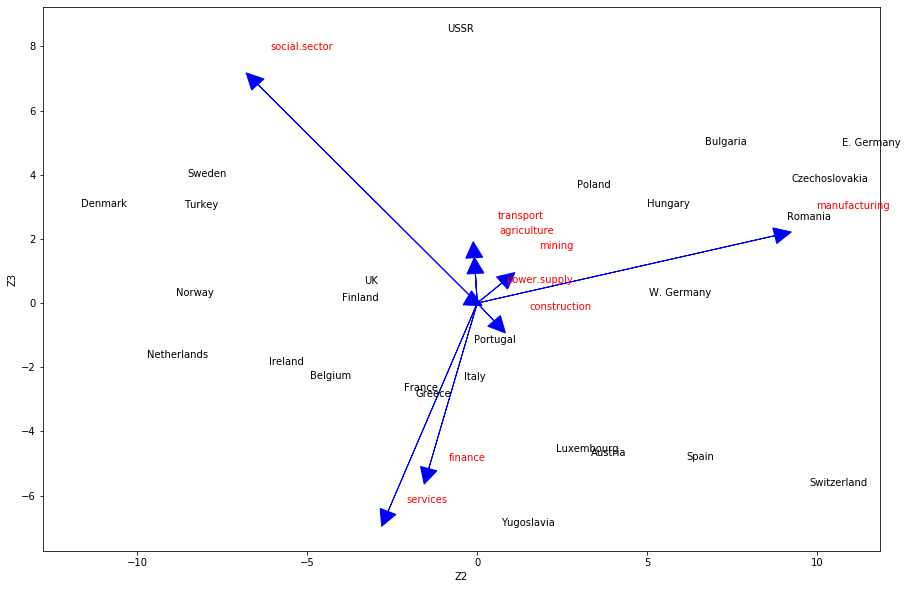

In [26]:
V_k=V_transpose.T[:,0:k]
fig, ax = plt.subplots(figsize=(15,10))
ax.set_xlabel('Z2')
ax.set_ylabel('Z3')
ax.scatter(x=Z_k[:,1],y=Z_k[:,2],s=0)
txt1=Industries.country
txt2=Industries.columns[1:]
gamma=12
for i, txt1 in enumerate(txt1):
    ax.annotate(txt1, (Z_k[i,1],Z_k[i,2]))
for i in range(Industries.shape[1]-1):  
    ax.arrow(0,0, 
             gamma*V_k[i,1],gamma*V_k[i,2],
             color="blue",
            length_includes_head=True,head_width=0.5, head_length=0.5)
    
    ax.annotate(txt2[i], (gamma*(V_k[i,1]+0.06),gamma*(V_k[i,2]+0.06)),
                color='red')
plt.show()

A few remarks/conclusions about the biplot:

* the origin corresponds to the sample average of the 9-dimensional observations in
  the data matrix
  
* Portugal is close to the origin and thus one could say that the distribution of employment in
 Portugal is  the average in all industrial sectors.
  
* projecting Yugoslavia orthogonally onto the vector $\mathbf{\tilde v}_{3j}$ of services (i.e., $j$ = services), 
we get a large and negative $x_{3ij}$. Hence, people in Yugoslavia tend to practice less services.
  
* projecting USSR orthogonally onto the vector $\mathbf{\tilde v}_{3j}$ of transport (i.e., $j$ = transport),
we get a large and positive $x_{3ij}$. Hence, people in USSR tend to employ many people in transport.

* projecting E.Germany orthogonally onto the vector $\mathbf{\tilde v}_{3j}$ of manufacturing (i.e., $j$ = manufacturing),
we get a large and positive $x_{3ij}$. Hence, people in E.Germany tend to employ many people in manufacturing.

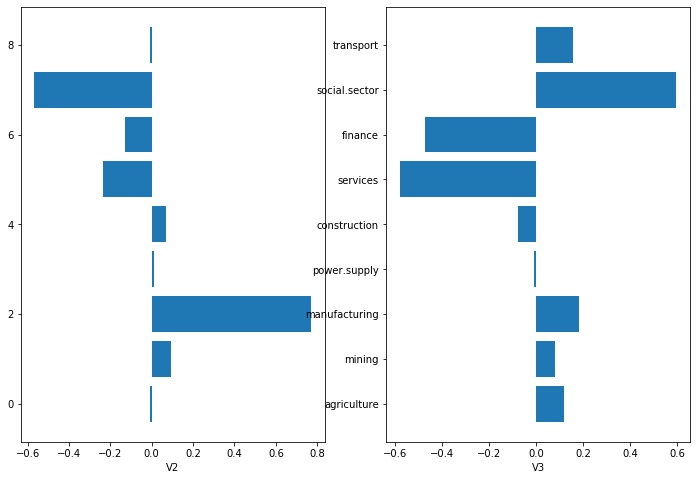

In [36]:
fig, ax = plt.subplots(1,2,figsize=(12,8))
y_pos = np.arange(9)

ax[0].set_xlabel('V2')
ax[1].set_xlabel('V3')

# Create horizontal bars
ax[0].barh(y_pos, V_k[:,1])
ax[1].barh(y_pos, V_k[:,2])
plt.yticks(y_pos, Industries.columns[1:])
plt.show()

For $\mathbf v_2$ (1st dimension of $\mathbf Z_3$ ):
* contrast of manufacturing and mining versus social sector and services.
* a large value of $z_{i3}$ can result from huge employment in manufacturing and mining, but less employment in services and social sector.
* a small value of $z_{i3}$ can result from less employment in manufacturing and mining, but huge employment in services and social sector.

For $\mathbf v_3$ (2nd dimension of $\mathbf Z_3$ ):
* contrast of social sector versus services and finance
* a large value of $z_{i3}$ can result from huge employment in social sector, but less employment in services and finance.
* a small value of $z_{i3}$ can result from less employment in social sector, but huge employment in services and finance.